# Proyecto Final: Caracterización Geospacial del Covid-19 en Antioquia
## Análisis Geoespacial - Edier V. Aristizabal G.
### Universidad Nacional de Colombia - Sede Medellín, Facultad de Minas

By Alvin Garcia Chaves

Especializacón en Analítica

## Load Data
Sources Geoportal DANE, Datos abiertos Colombia

- https://geoportal.dane.gov.co/
- https://www.datos.gov.co/

In [ ]:
%pip install geopandas

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import geopandas as gpd
pd.set_option('display.max_columns', None)

In [59]:
map_colombia_mpio_path = '../../Data/MGN2024_MPIO_POLITICO/MGN_ADM_MPIO_GRAFICO.shp'
# map_colombia_dpto_path = '../../Data/MGN2024_DPTO_POLITICO/MGN_ADM_DPTO_POLITICO.shp'
data_path = '../../Data/Casos_positivos_de_COVID-19_en_Colombia._20250404.csv'
# Read the shapefile
map_colombia = gpd.read_file(map_colombia_mpio_path)
# Read the CSV file
df_data = pd.read_csv(data_path)

/var/folders/nq/kj34bm5140bgwbktdx1z94cm0000gn/T/ipykernel_1698/1500435018.py:7: DtypeWarning: Columns (14) have mixed types. Specify dtype option on import or set low_memory=False.
  df_data = pd.read_csv(data_path)


In [33]:
# Check the type of the object
type(map_colombia)


geopandas.geodataframe.GeoDataFrame

In [60]:
# Check the type of the object
type(df_data)

pandas.core.frame.DataFrame

In [67]:
map_colombia.info()


<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1121 entries, 0 to 1120
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   dpto_ccdgo  1121 non-null   object  
 1   mpio_ccdgo  1121 non-null   object  
 2   mpio_cdpmp  1121 non-null   object  
 3   dpto_cnmbr  1121 non-null   object  
 4   mpio_cnmbr  1121 non-null   object  
 5   mpio_crslc  1121 non-null   object  
 6   mpio_tipo   1121 non-null   object  
 7   mpio_narea  1121 non-null   float64 
 8   mpio_nano   1121 non-null   int32   
 9   shape_Leng  1121 non-null   float64 
 10  shape_Area  1121 non-null   float64 
 11  geometry    1121 non-null   geometry
dtypes: float64(3), geometry(1), int32(1), object(7)
memory usage: 100.8+ KB


In [68]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6390971 entries, 0 to 6390970
Data columns (total 23 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   fecha reporte web             object 
 1   ID de caso                    int64  
 2   Fecha de notificación         object 
 3   Código DIVIPOLA departamento  int64  
 4   Nombre departamento           object 
 5   Código DIVIPOLA municipio     int64  
 6   Nombre municipio              object 
 7   Edad                          int64  
 8   Unidad de medida de edad      int64  
 9   Sexo                          object 
 10  Tipo de contagio              object 
 11  Ubicación del caso            object 
 12  Estado                        object 
 13  Código ISO del país           float64
 14  Nombre del país               object 
 15  Recuperado                    object 
 16  Fecha de inicio de síntomas   object 
 17  Fecha de muerte               object 
 18  Fecha de diagnóstico  

In [78]:
# Check the first few rows of the dataframe
df_data.head()

,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
0,2020-12-24 00:00:00,1556979,2020-12-22 00:00:00,76,VALLE,76001,CALI,67,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN
1,2020-12-24 00:00:00,1556980,2020-12-19 00:00:00,76,VALLE,76001,CALI,66,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-12-07 00:00:00,NaN,2020-12-23 00:00:00,2020-12-25 00:00:00,Tiempo,6.0,NaN
2,2020-12-24 00:00:00,1556981,2020-12-19 00:00:00,76,VALLE,76001,CALI,68,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-12-18 00:00:00,NaN,2020-12-22 00:00:00,2021-01-01 00:00:00,Tiempo,6.0,NaN
3,2020-12-24 00:00:00,1556982,2020-12-22 00:00:00,76,VALLE,76001,CALI,74,1,F,Comunitaria,Fallecido,Fallecido,NaN,NaN,Fallecido,2020-12-17 00:00:00,2020-12-30 00:00:00,2020-12-23 00:00:00,NaN,NaN,6.0,NaN
4,2020-12-24 00:00:00,1556983,2020-12-22 00:00:00,76,VALLE,76001,CALI,65,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-12-21 00:00:00,NaN,2020-12-23 00:00:00,2021-01-04 00:00:00,Tiempo,6.0,NaN


In [79]:
# Check the first 5 rows of the dataframe
map_colombia.head()


,dpto_ccdgo,mpio_ccdgo,mpio_cdpmp,dpto_cnmbr,mpio_cnmbr,mpio_crslc,mpio_tipo,mpio_narea,mpio_nano,shape_Leng,shape_Area,geometry
0,05,001,05001,ANTIOQUIA,MEDELLÍN,1965,MUNICIPIO,374.834005,2024,1.035380,0.030608,"POLYGON ((-75.66974 6.3736, -75.66965 6.3736, ..."
1,05,002,05002,ANTIOQUIA,ABEJORRAL,1814,MUNICIPIO,507.141095,2024,1.158504,0.041384,"POLYGON ((-75.46938 5.94575, -75.46897 5.94571..."
2,05,004,05004,ANTIOQUIA,ABRIAQUÍ,1912,MUNICIPIO,296.894050,2024,0.812183,0.024248,"POLYGON ((-76.08351 6.7505, -76.08325 6.75048,..."
3,05,021,05021,ANTIOQUIA,ALEJANDRÍA,Decreto departamental 304 de 1907,MUNICIPIO,128.932153,2024,0.705200,0.010535,"POLYGON ((-75.0332 6.41586, -75.03313 6.41585,..."
4,05,030,05030,ANTIOQUIA,AMAGÁ,1912,MUNICIPIO,84.132477,2024,0.445533,0.006867,"POLYGON ((-75.67587 6.08561, -75.6754 6.08491,..."


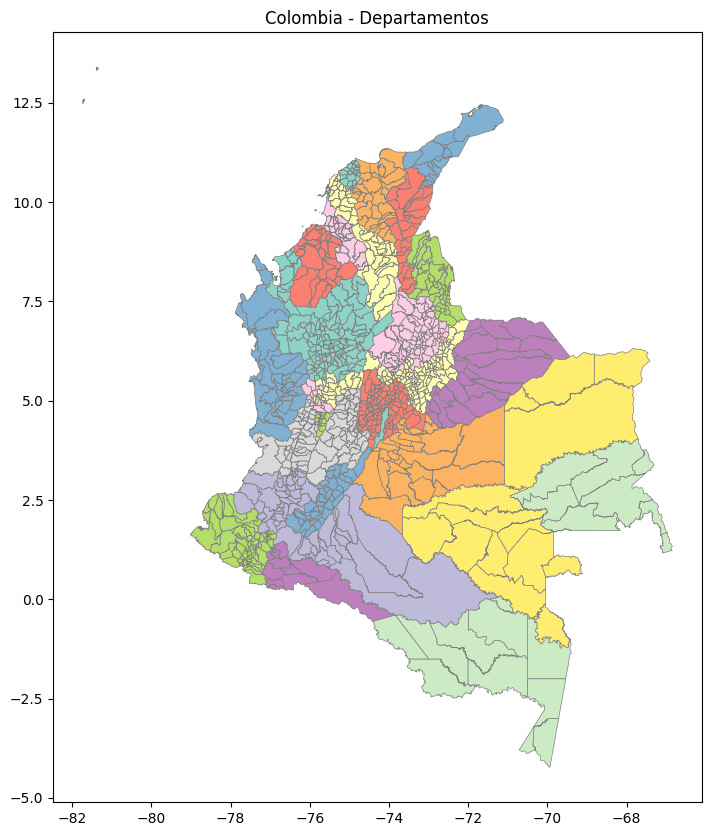

In [80]:
map_colombia.plot(column='dpto_ccdgo', 
                  cmap='Set3', 
                  figsize=(10, 10), 
                  edgecolor='grey',
                  linewidth=0.5,)
plt.title('Colombia - Departamentos')
plt.show()


## Filter Data

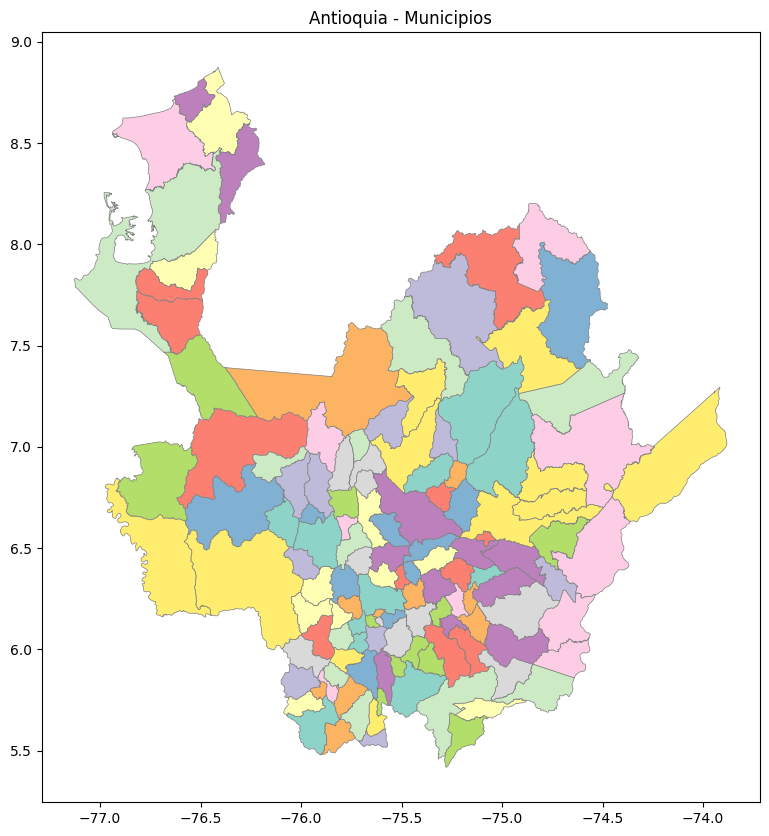

In [84]:
map_antioquia = map_colombia.query('dpto_ccdgo == "05"')
map_antioquia.plot(cmap='Set3', 
                  figsize=(10, 10), 
                  edgecolor='grey',
                  linewidth=0.5,)
plt.title('Antioquia - Municipios')
plt.show()


In [86]:
data_antioquia = df_data[df_data["Código DIVIPOLA departamento"] == 5]


In [87]:
data_antioquia.info()

<class 'pandas.core.frame.DataFrame'>
Index: 955271 entries, 14 to 6390951
Data columns (total 23 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   fecha reporte web             955271 non-null  object 
 1   ID de caso                    955271 non-null  int64  
 2   Fecha de notificación         955271 non-null  object 
 3   Código DIVIPOLA departamento  955271 non-null  int64  
 4   Nombre departamento           955271 non-null  object 
 5   Código DIVIPOLA municipio     955271 non-null  int64  
 6   Nombre municipio              955271 non-null  object 
 7   Edad                          955271 non-null  int64  
 8   Unidad de medida de edad      955271 non-null  int64  
 9   Sexo                          955271 non-null  object 
 10  Tipo de contagio              955271 non-null  object 
 11  Ubicación del caso            950658 non-null  object 
 12  Estado                        950658 non-null  

In [88]:
data_antioquia.head()


,fecha reporte web,ID de caso,Fecha de notificación,Código DIVIPOLA departamento,Nombre departamento,Código DIVIPOLA municipio,Nombre municipio,Edad,Unidad de medida de edad,Sexo,Tipo de contagio,Ubicación del caso,Estado,Código ISO del país,Nombre del país,Recuperado,Fecha de inicio de síntomas,Fecha de muerte,Fecha de diagnóstico,Fecha de recuperación,Tipo de recuperación,Pertenencia étnica,Nombre del grupo étnico
14,2020-11-08 00:00:00,1137429,2020-11-05 00:00:00,5,ANTIOQUIA,5266,ENVIGADO,37,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-10-31 00:00:00,NaN,2020-11-06 00:00:00,2021-04-25 00:00:00,PCR,6.0,NaN
18,2020-11-08 00:00:00,1137433,2020-11-04 00:00:00,5,ANTIOQUIA,5266,ENVIGADO,37,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-10-31 00:00:00,NaN,2020-11-04 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,NaN
22,2020-11-08 00:00:00,1137437,2020-11-03 00:00:00,5,ANTIOQUIA,5360,ITAGUI,36,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-10-31 00:00:00,NaN,2020-11-04 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,NaN
31,2020-11-08 00:00:00,1137446,2020-11-05 00:00:00,5,ANTIOQUIA,5266,ENVIGADO,63,1,F,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-10-31 00:00:00,NaN,2020-11-06 00:00:00,2020-11-15 00:00:00,Tiempo,6.0,NaN
55,2020-08-05 00:00:00,338105,2020-08-01 00:00:00,5,ANTIOQUIA,5001,MEDELLIN,52,1,M,Comunitaria,Casa,Leve,NaN,NaN,Recuperado,2020-07-30 00:00:00,NaN,2020-08-05 00:00:00,2020-08-24 00:00:00,Tiempo,5.0,NaN
